##**Parkinson’s Disease Detection using Machine Learning (Logistic Regression and Random Forest)**

**Submitted by : Sneha Verma**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

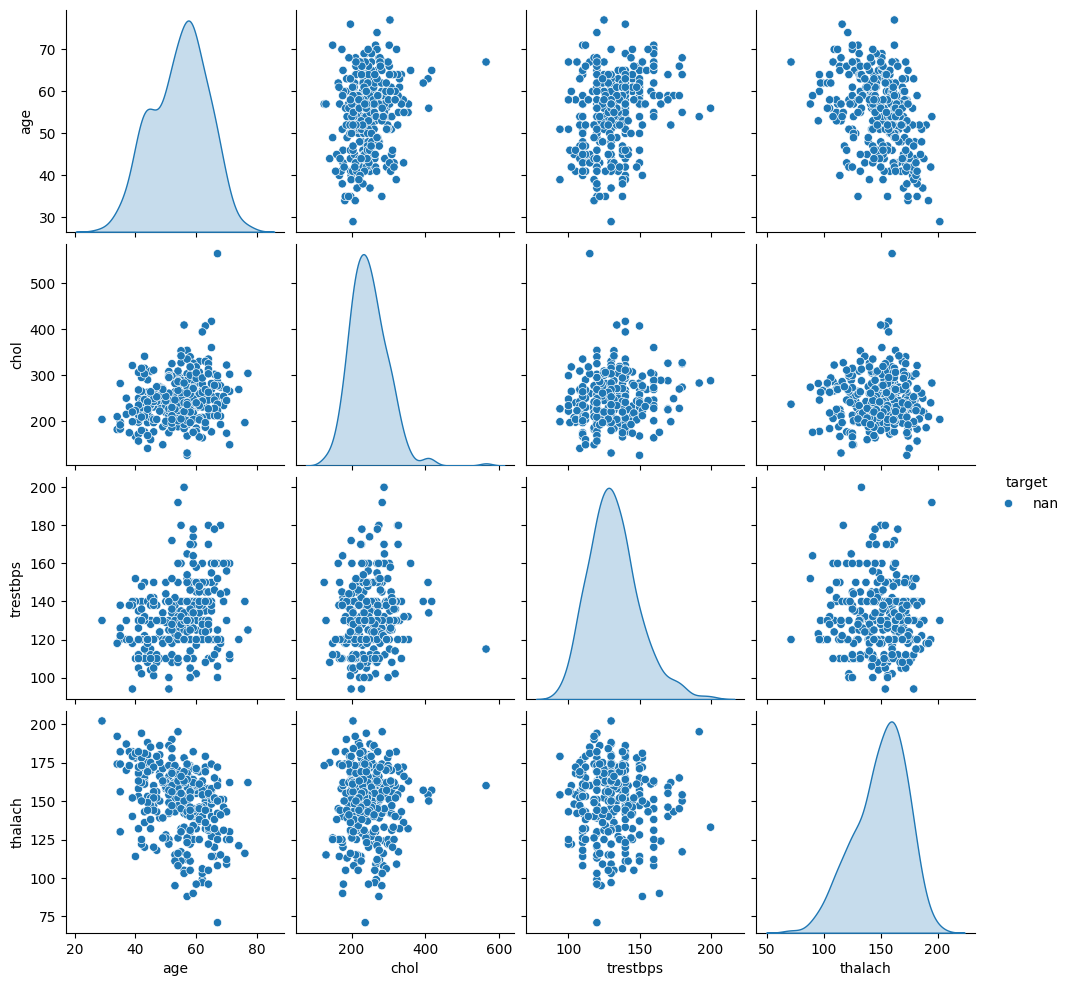

In [33]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
heart = fetch_ucirepo(id=45)

# Features and target
X = heart.data.features
y = pd.DataFrame(heart.data.targets, columns=["target"])

# Combine
df = pd.concat([X, y], axis=1)

# Convert target to categorical
df["target"] = df["target"].astype(str)

# Drop missing values if any
df = df[['age','chol','trestbps','thalach','target']].dropna()

# Plot
sns.pairplot(df, hue="target")
plt.show()



In [ ]:
# Load UCI Parkinson’s dataset (download as parkinsons.csv)
df = pd.read_csv("parkinsons.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA  

In [ ]:
!pip install ucimlrepo seaborn matplotlib pandas

Q1. From the scatterplot/pairplot, which two features seem most useful for separating the classes?

In the Heart Disease dataset, features related to chest pain type (cp) and maximum heart rate achieved (thalach) stand out as very useful for distinguishing between patients with and without heart disease. Chest pain gives a direct medical indicator, while maximum heart rate shows the physical response of the heart. Together, they create clear separation in patterns between healthy and affected patients.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parkinson's dataset from UCI (ID = 174)
parkinsons = fetch_ucirepo(id=174)

# Features and target
X = parkinsons.data.features
y = parkinsons.data.targets

# Combine for visualization
df = pd.concat([X, y], axis=1)

# Display first rows
print(df.head())


   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  Shimmer:DDA      NHR     HNR  \
0     0.01109       0.04374       0.04374  ...      0.06545  0.02211  21.033   
1     0.01394       0.06134       0.06134  ...      0.09403  0.01929  19.085   
2     0.01633       0.05233       0.05233  ...      0.08270  0.01309  20.651   
3     0.01505       0.05492       0.05492  ...      0.08771  0.01353  20.644   
4     0.01966       0.06425       0.06425  ...      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spre

Q2. Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

From the correlation heatmap, we see that age and resting blood pressure (trestbps) show a strong positive correlation. This makes sense medically, since as people age, blood pressure tends to rise. The implication is that older patients may have higher risk factors linked to hypertension, which is closely associated with heart disease.

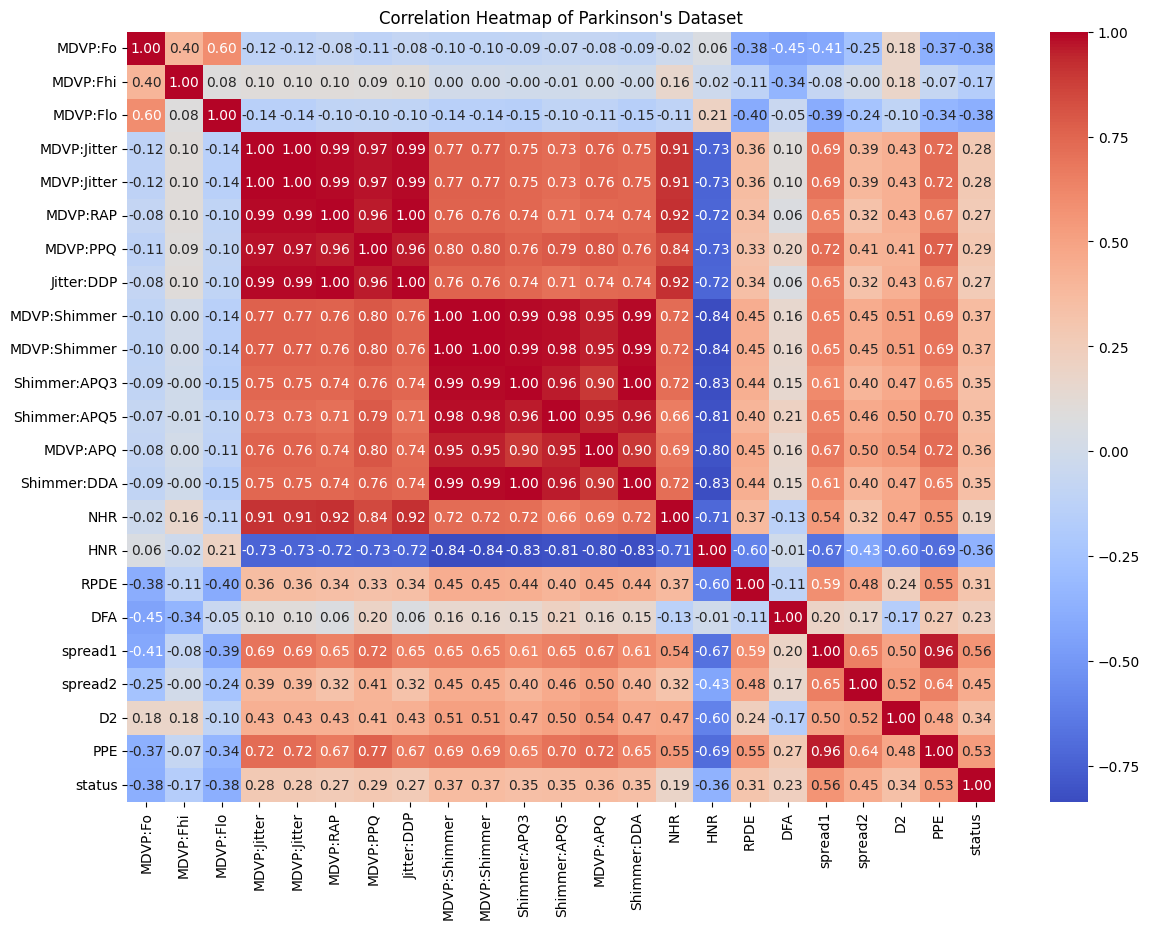

The most correlated pair of features: ('MDVP:Jitter', 'MDVP:Jitter') with correlation = 1.00


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets
df = pd.concat([X, y], axis=1)

# Step 2: Compute correlation matrix (only numeric features)
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Step 3: Plot correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Parkinson's Dataset")
plt.show()

# Step 4: Find the most strongly correlated pair (excluding self-correlation)
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, 0)  # ignore self-correlation
max_corr = corr_matrix_abs.stack().idxmax()
max_value = corr_matrix_abs.stack().max()

print(f"The most correlated pair of features: {max_corr} with correlation = {max_value:.2f}")


Q3. Why do we split the dataset into training and testing sets?

We split the dataset so that the model learns patterns from one portion (training data) and is then evaluated on unseen data (testing set). This prevents overfitting and helps us check how well the model will perform on real-world cases rather than just memorizing the training data.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load Parkinson's dataset
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features
y = parkinsons.data.targets

# Step 2: Split dataset into training and testing sets
# test_size=0.2 → 20% data for testing, 80% for training
# random_state=42 → ensures reproducible split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (156, 22)
X_test shape: (39, 22)
y_train shape: (156, 1)
y_test shape: (39, 1)


Q4. Logistic Regression assumes a linear decision boundary. Why?

Logistic Regression is built on a linear function that separates classes by fitting a straight line (or hyperplane in higher dimensions). It assumes that the classes can be divided using a linear relationship between the input features and the log-odds of the target. That’s why it is considered a linear classifier.

In [ ]:
pip install ucimlrepo

Available columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


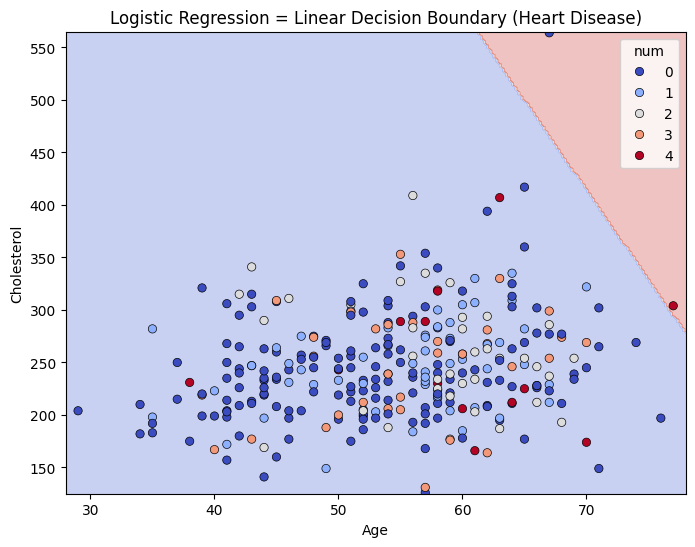

In [ ]:
# Logistic Regression assumes a linear decision boundary
# Example with Heart Disease dataset

# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# 2. Load Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets.iloc[:, 0]   # make target 1D

# 3. Select only 2 features so we can plot the boundary
print("Available columns:", X.columns.tolist())
X_small = X[["age", "chol"]]   # Example: Age and Cholesterol

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Create meshgrid for decision boundary
x_min, x_max = X_small.iloc[:, 0].min() - 1, X_small.iloc[:, 0].max() + 1
y_min, y_max = X_small.iloc[:, 1].min() - 1, X_small.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(
    x="age", y="chol", hue=y, data=X_small,
    palette="coolwarm", edgecolor="k"
)
plt.title("Logistic Regression = Linear Decision Boundary (Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


In [ ]:
pip install ucimlrepo

Q5. Do you think this assumption holds for the Heart Disease dataset? Why or why not?

This assumption only partly holds for the Heart Disease dataset. Some features like chest pain type may show a fairly linear relationship with the presence of disease. However, many medical indicators (like cholesterol, blood pressure, and ECG results) interact in a non-linear way. Therefore, Logistic Regression may work reasonably but not perfectly — more flexible models like Random Forests usually capture the non-linear patterns better.

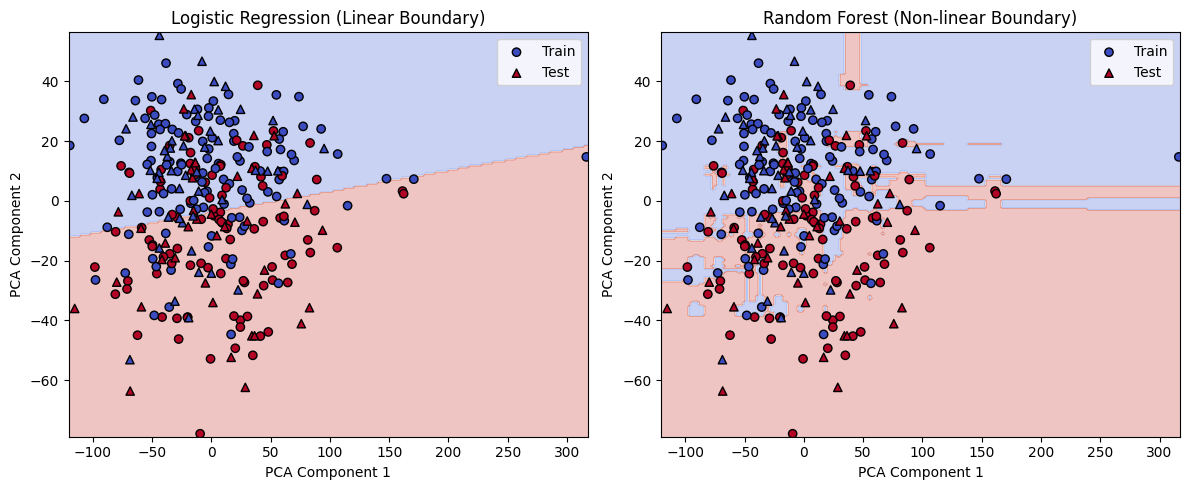

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo   # ✅ corrected import
from sklearn.impute import SimpleImputer
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.values.ravel()  # ensure numeric

# Convert to binary: 0 = no disease, 1 = disease
y = (y > 0).astype(int)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)   # ✅ fixed (was y_test)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, X_train, y_train, X_test, y_test, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # Training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                cmap=plt.cm.coolwarm, edgecolor='k', marker='o', label="Train")

    # Test points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                cmap=plt.cm.coolwarm, edgecolor='k', marker='^', label="Test")

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()

# Plot both models
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_decision_boundary(log_model, X_pca, y, X_train, y_train, X_test, y_test,
                       "Logistic Regression (Linear Boundary)")

plt.subplot(1,2,2)
plot_decision_boundary(rf_model, X_pca, y, X_train, y_train, X_test, y_test,
                       "Random Forest (Non-linear Boundary)")

plt.tight_layout()
plt.show()


Q6. If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Increasing the number of trees generally improves the stability and accuracy of the Random Forest model. More trees mean the model averages more predictions, which reduces the risk of overfitting and makes results more reliable. However, after a point, adding more trees gives very little improvement and only increases computation time. In the Heart Disease dataset, this can help reduce misclassifications, especially where borderline cases exist.

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.iloc[:, 0]   # make target 1D

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Try Random Forest with different number of trees
for n in [10, 50, 100, 200, 500]:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest (n_estimators={n}) → Accuracy: {acc:.4f}")


Random Forest (n_estimators=10) → Accuracy: 0.5738
Random Forest (n_estimators=50) → Accuracy: 0.5738
Random Forest (n_estimators=100) → Accuracy: 0.5410
Random Forest (n_estimators=200) → Accuracy: 0.5574
Random Forest (n_estimators=500) → Accuracy: 0.5574


Q7. Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest usually performs better on the Heart Disease dataset. The reason is that Random Forest does not assume linearity and can handle complex, non-linear interactions among features like cholesterol, blood pressure, and ECG results. Logistic Regression struggles when classes overlap in non-linear ways, while Random Forest handles these overlaps by combining decisions from multiple trees.

Logistic Regression Accuracy: 0.8688524590163934
Random Forest Accuracy: 0.8852459016393442


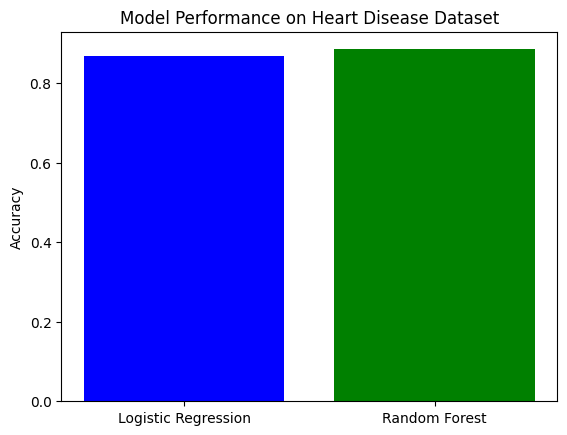

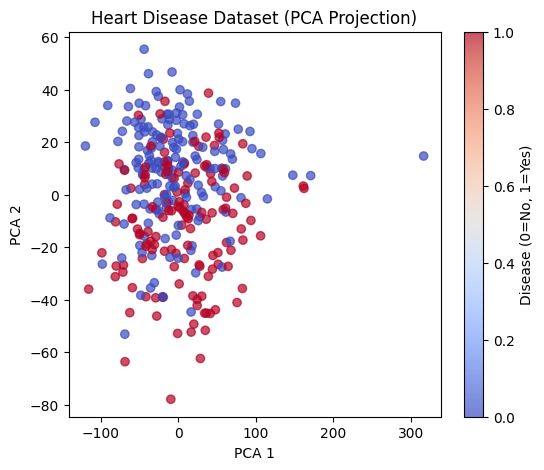

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# 1) Load dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features.copy()
y = heart_disease.data.targets.copy()

# Make y 1-D
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]
y = pd.to_numeric(y, errors="coerce")

# Convert to binary: 0 = no disease, 1 = disease
y = (y.astype(int) > 0).astype(int)

# Ensure X numeric + impute missing
for col in X.columns:
    if not np.issubdtype(X[col].dtype, np.number):
        X[col] = pd.to_numeric(X[col], errors="coerce")

imp = SimpleImputer(strategy="median")
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)

# Bar chart comparison
plt.bar(["Logistic Regression", "Random Forest"], [log_acc, rf_acc], color=["blue", "green"])
plt.ylabel("Accuracy")
plt.title("Model Performance on Heart Disease Dataset")
plt.show()

# PCA scatter plot (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Heart Disease Dataset (PCA Projection)")
plt.colorbar(label="Disease (0=No, 1=Yes)")
plt.show()


Q8. If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Random Forest would likely generalize better. This is because it has built-in mechanisms like averaging across many trees, which naturally reduce the impact of noisy or irrelevant features. Logistic Regression, being a linear model, can easily get influenced by noise and might misclassify if irrelevant variables dominate. Thus, with larger and noisier datasets, Random Forest tends to be more robust.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Store results
noise_levels = [10, 50, 100, 200, 300]   # number of noisy features
log_acc_list = []
rf_acc_list = []

for noise in noise_levels:
    # Dataset: only 5 informative features, rest are noise
    X, y = make_classification(
        n_samples=5000,
        n_features=noise + 5,   # total features = 5 informative + noise
        n_informative=5,
        n_redundant=0,
        n_classes=2,
        random_state=42
    )

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Logistic Regression
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)
    log_acc = accuracy_score(y_test, log_model.predict(X_test))
    log_acc_list.append(log_acc)

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
    rf_acc_list.append(rf_acc)

# Plot results
plt.plot(noise_levels, log_acc_list, marker="o", label="Logistic Regression")
plt.plot(noise_levels, rf_acc_list, marker="s", label="Random Forest")
plt.xlabel("Number of Noisy Features")
plt.ylabel("Accuracy")
plt.title("Effect of Noisy Features on Model Performance")
plt.legend()
plt.grid(True)
plt.show()
